## Accessing DM-EFD data


In this notebook, I used Robert Lupton's code that unpacks the 100 samples/second datapoints in the EFD
to plot the Nasmyth2 motor torque during a run when we were varying the Nasmyth2 angle to investigate
the horizontal banding problem caused (probably) by electrical noise.

In [18]:
import sys, time, os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq

from astropy.time import Time, TimeDelta
from lsst_efd_client import EfdClient, merge_packed_time_series

We'll access the EFD instance deployed at the Summit.

In [2]:
client = EfdClient('summit_efd')

In [41]:
t_end = Time("2021-06-10T05:00:00", scale='tai')   # timestamp at end of desired data 
nsec = 6.0*3600 # how many seconds of data to retrieve
t_start = t_end - TimeDelta(nsec, format='sec')
elevation_torque = await client.select_time_series("lsst.sal.ATMCS.measuredTorque", ['*'],
                                              t_start, t_end)
torque = merge_packed_time_series(elevation_torque, 'elevationMotorTorque', stride=1)
elevation_angle = await client.select_time_series("lsst.sal.ATMCS.mount_AzEl_Encoders", ['*'],
                                              t_start, t_end)
angle = merge_packed_time_series(elevation_angle, 'elevationCalculatedAngle', stride=1)

In [42]:
len(angle)

2158900

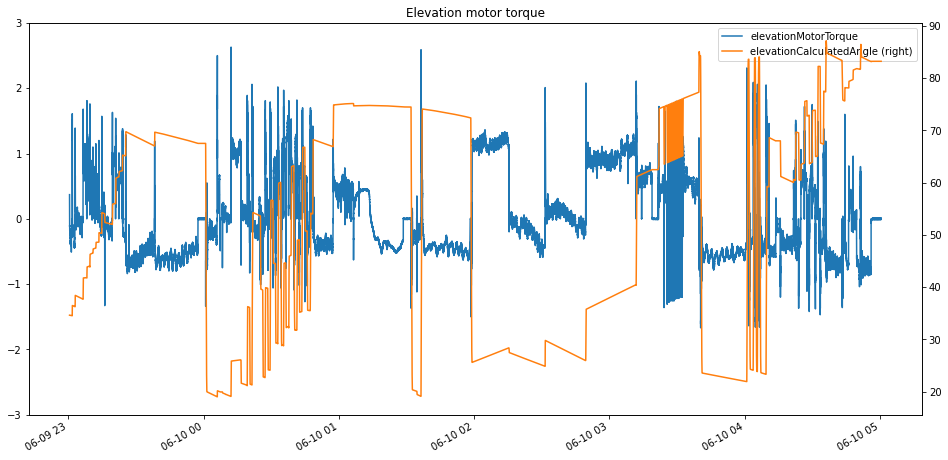

In [45]:
ax1 = torque['elevationMotorTorque'].plot(figsize=(16,8), title='Elevation motor torque', legend=True)
#ax1.axhline(3.0, color="blue", linestyle="--")
#ax1.axhline(-3.0, color="blue", linestyle="--")
plt.ylim(-3.0,3.0)
angle['elevationCalculatedAngle'].plot(legend=True, secondary_y=True)
plt.savefig("/home/craiglagegit/DATA/Elevation_Torque_09Jun21.pdf")

Text(0, 0.5, 'Torque (amps)')

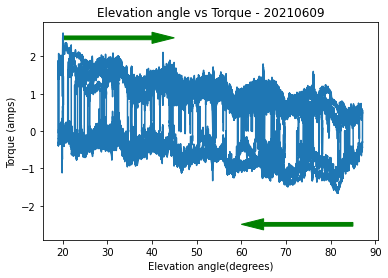

In [47]:
torqueList = torque.values.tolist()
angleList = angle.values.tolist()
plt.figure()
plt.title("Elevation angle vs Torque - 20210609")
plt.plot(np.array(angleList)[:,0],np.array(torqueList)[:,0])
#plt.plot([20, 85],[3.0,3.0], color='red', ls='--')
#plt.plot([20,85],[-3.0,-3.0], color='red', ls='--')
plt.arrow(20, 2.5, 20,0, width=0.1,head_length = 5.0, color='green')
plt.arrow(85, -2.5, -20,0, width=0.1,head_length = 5.0, color='green')
plt.xlabel("Elevation angle(degrees)")
plt.ylabel("Torque (amps)")
#plt.savefig("/home/craiglagegit/DATA/Torque_vs_Angle3_09Apr21.pdf")

In [51]:
t_end = Time("2021-05-25T03:00:00", scale='tai')   # timestamp at end of desired data 
nsec = 4.0*3600 # how many seconds of data to retrieve
t_start = t_end - TimeDelta(nsec, format='sec')
elevation_torque = await client.select_time_series("lsst.sal.ATMCS.measuredTorque", ['*'],
                                              t_start, t_end)
#torque = merge_packed_time_series(elevation_torque, 'elevationMotorTorque', stride=1)
elevation_angle = await client.select_time_series("lsst.sal.ATMCS.mount_AzEl_Encoders", ['*'],
                                              t_start, t_end)
#angle = merge_packed_time_series(elevation_angle, 'elevationCalculatedAngle', stride=1)

In [52]:
len(elevation_angle)

0

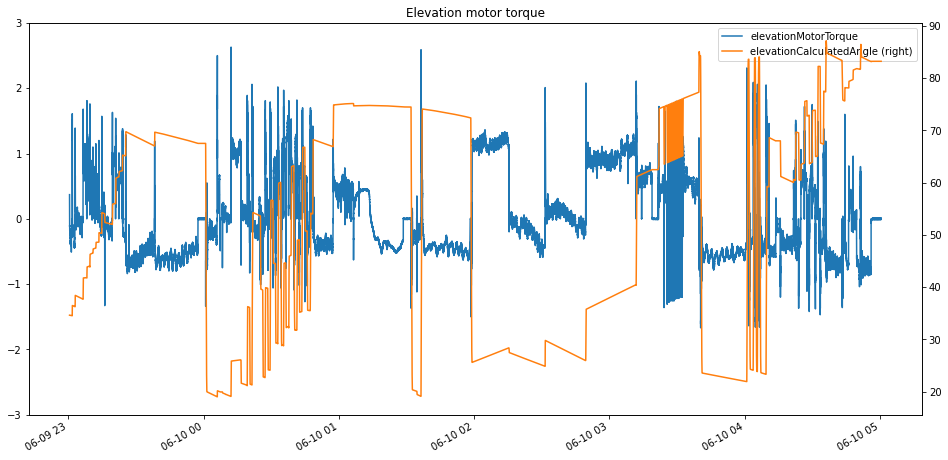

In [45]:
ax1 = torque['elevationMotorTorque'].plot(figsize=(16,8), title='Elevation motor torque', legend=True)
#ax1.axhline(3.0, color="blue", linestyle="--")
#ax1.axhline(-3.0, color="blue", linestyle="--")
plt.ylim(-3.0,3.0)
angle['elevationCalculatedAngle'].plot(legend=True, secondary_y=True)
plt.savefig("/home/craiglagegit/DATA/Elevation_Torque_09Jun21.pdf")

Text(0, 0.5, 'Torque (amps)')

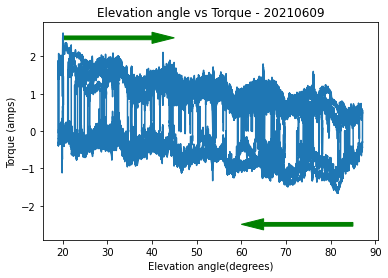

In [47]:
torqueList = torque.values.tolist()
angleList = angle.values.tolist()
plt.figure()
plt.title("Elevation angle vs Torque - 20210609")
plt.plot(np.array(angleList)[:,0],np.array(torqueList)[:,0])
#plt.plot([20, 85],[3.0,3.0], color='red', ls='--')
#plt.plot([20,85],[-3.0,-3.0], color='red', ls='--')
plt.arrow(20, 2.5, 20,0, width=0.1,head_length = 5.0, color='green')
plt.arrow(85, -2.5, -20,0, width=0.1,head_length = 5.0, color='green')
plt.xlabel("Elevation angle(degrees)")
plt.ylabel("Torque (amps)")
#plt.savefig("/home/craiglagegit/DATA/Torque_vs_Angle3_09Apr21.pdf")